In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 1. Lecture of the data correspondig to may-2022

In [2]:
# Specify the directory where the file is located
directory = "../data/raw"

# Find the file with the specific name pattern
filename = next(f for f in os.listdir(directory) if f.startswith("yellow_tripdata_2022-05"))

# Construct the full file path
file_path = os.path.join(directory, filename)

# Read the file using pandas
df_may = pd.read_parquet(file_path)

# 2. Basic analysis of the dataframe

In [3]:
print('The shape of the dataframe is', df_may.shape)
print('The name of the columns of the dataframe are', df_may.columns)

The shape of the dataframe is (3588295, 19)
The name of the columns of the dataframe are Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')


In [4]:
#Resume of the data from each column of the dataframe
df_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588295 entries, 0 to 3588294
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

The following cell shows the total amount of columns with an specific type of a data. In this particular set, we have the types: float, integer, datetime, and only one column with string data.

In [5]:
df_may.dtypes.value_counts()

float64           12
int64              4
datetime64[us]     2
object             1
Name: count, dtype: int64

A quick review of the dataframe:

In [6]:
df_may.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.10,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.00,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.30,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.00,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.20,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.00,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.00,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.00,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.60,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.00,0.3,13.55,2.5,0.0
5,2,2022-04-30 23:53:47,2022-05-01 00:05:17,1.0,1.87,1.0,N,249,164,1,9.5,0.5,0.5,2.66,0.00,0.3,15.96,2.5,0.0
6,2,2022-05-01 00:07:11,2022-05-01 00:19:24,1.0,3.35,1.0,N,164,112,1,12.5,0.5,0.5,3.43,6.55,0.3,26.28,2.5,0.0
7,2,2022-05-01 00:14:38,2022-05-01 00:33:09,2.0,2.58,1.0,N,79,68,1,13.0,0.5,0.5,3.36,0.00,0.3,20.16,2.5,0.0
8,2,2022-05-01 00:36:36,2022-05-01 01:07:08,1.0,4.55,1.0,N,68,87,1,20.5,0.5,0.5,4.86,0.00,0.3,29.16,2.5,0.0
9,1,2022-05-01 00:17:43,2022-05-01 00:30:32,0.0,2.70,1.0,N,48,145,1,11.5,3.0,0.5,2.00,0.00,0.3,17.30,2.5,0.0


# 3. Analyzing the data

### 3.1. Dispersion of the data

If we need to train a machine learning model for our problem, the first step is to clean the data by removing potential outliers. To begin this process, we assess the dispersion of the numerical data columns.

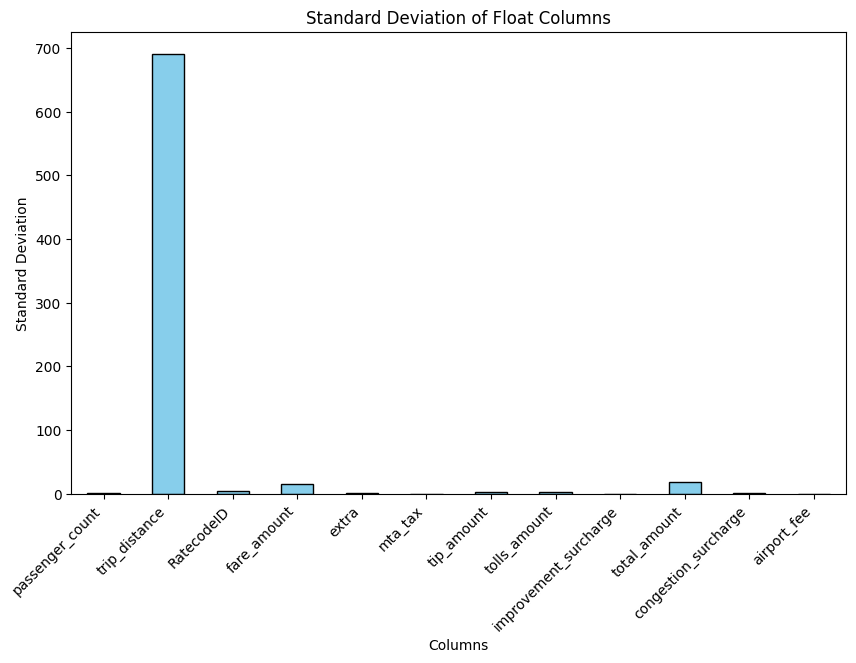

In [7]:
# Select only float columns and calculate their standard deviation
float_columns = df_may.select_dtypes(include='float')
std_values = float_columns.std()

# Plot the bar chart
plt.figure(figsize=(10, 6))
std_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Standard Deviation of Float Columns')
plt.xlabel('Columns')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45, ha='right')
plt.show()

From this plot we see that the trip distance has the highest standard deviation, and therefore, it is the most variable column. Now, if we remove this column, we can see that the standard deviation of the rest of the columns is much lower, and they are more stable. The following cell present the graph without the trip distance column.

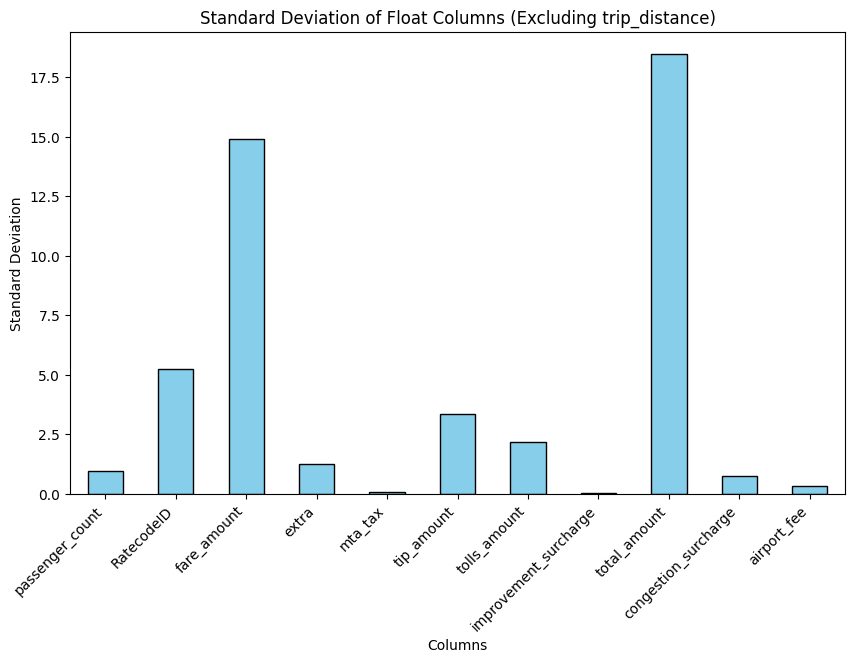

In [8]:
# Select only float columns and calculate their standard deviation
float_columns = df_may.select_dtypes(include='float')
std_values = float_columns.std()

# Remove 'trip_distance' from the standard deviation values
std_values = std_values.drop('trip_distance', errors='ignore')

# Plot the bar chart
plt.figure(figsize=(10, 6))
std_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Standard Deviation of Float Columns (Excluding trip_distance)')
plt.xlabel('Columns')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45, ha='right')
plt.show()

Despite the standar deviations of the rest of the data is much lower than the deviation of the trip distance, we have some columns that are more spread out than others. Now, we take a look of the most disperse column:

In [9]:
df_may['trip_distance'].describe()

count    3.588295e+06
mean     6.856861e+00
std      6.908488e+02
min      0.000000e+00
25%      1.150000e+00
50%      1.960000e+00
75%      3.730000e+00
max      3.571927e+05
Name: trip_distance, dtype: float64

We see that there exists some trips that have a very large distance, despite the fact that the $75\%$ of the distance is under $3.73$ milles. Therefore, this column has several outliers that we must remove before the training. Another particular anomality is that there exists a trip with a zero distance.

### 3.2. Introduction of the time duration of the trips as a new feature

The model we need to train must predict the time duration of a trip. Therefore, it is necessary to calculate the time difference between the pick-up and drop-off times. Therefore, In order to manage the duration of each trip, we must calculate the difference between the drop off and pick up dates. We add a new column to the dataframe, called 'diff_time' for this purpose

In [10]:
df_may['diff_time'] = df_may['tpep_dropoff_datetime'] - df_may['tpep_pickup_datetime']

It can be shown that there exist negative diferrences of time. This fact tell us that the time of picking up the passenger is larger than the dropping out time. The following cell reports that, in fact, there exist a little percent of this kind of trips inside the dataframe

In [11]:
n = (df_may['diff_time'].dt.total_seconds()<0).sum()

negative_time_trips_percentage = n/df_may.shape[0]

print(f'The percentage of trips with negative time is {negative_time_trips_percentage*100}%')

print(f'The percentage of trips with valid times is {(1-negative_time_trips_percentage)*100}')

The percentage of trips with negative time is 0.03533711693157893%
The percentage of trips with valid times is 99.96466288306843


Because it is not seems logical that a trip starts after the drop out date reported, we drop all those entries that reports negative differences of time between the drop off and pick up dates. 

In [12]:
df_may = df_may.drop(df_may[df_may['diff_time'].dt.total_seconds() < 0].index)

Now, in the dataframe we notice that there exists trips with durations of several days (2, 3, even 4 days). The following dataframe called 'day_ranges' show us the rides that reports this anomalies

In [13]:
day_ranges = pd.DataFrame()

# Ranges of days for a trip, between 0 to 1, 1 to 2, etc
day_ranges['ranges'] = [f'{i}-{i+1}' for i in range(0, 4, 1)]

day_ranges['total_rides'] = df_may['diff_time'].dt.days.value_counts().sort_index().values
s = day_ranges['total_rides'].sum()
day_ranges['percent'] = (day_ranges['total_rides'] / s)*100
day_ranges

,ranges,total_rides,percent
0,0-1,3587008,99.999470
1,1-2,15,0.000418
2,2-3,2,0.000056
3,3-4,2,0.000056


The number of trips that take 2, 3 or 4 days are less than the $0.001 \%$. Therefore, we consider that those trips are outliers from our analysis; therefore, we only keep trips with a duration of less than one day.

In [14]:
df_may_less_1_day = df_may[df_may['diff_time'] < pd.Timedelta(days=1)]

df_may_less_1_day.shape

(3587008, 20)

Now, we need to know the duration of each trip. The following cell show us the histogram of the number of trips grouped by the duration of them.

C:\Users\Modemat\AppData\Local\Temp\ipykernel_241216\3093232342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may_less_1_day['hours'] = df_may_less_1_day['diff_time'].dt.total_seconds() // 3600


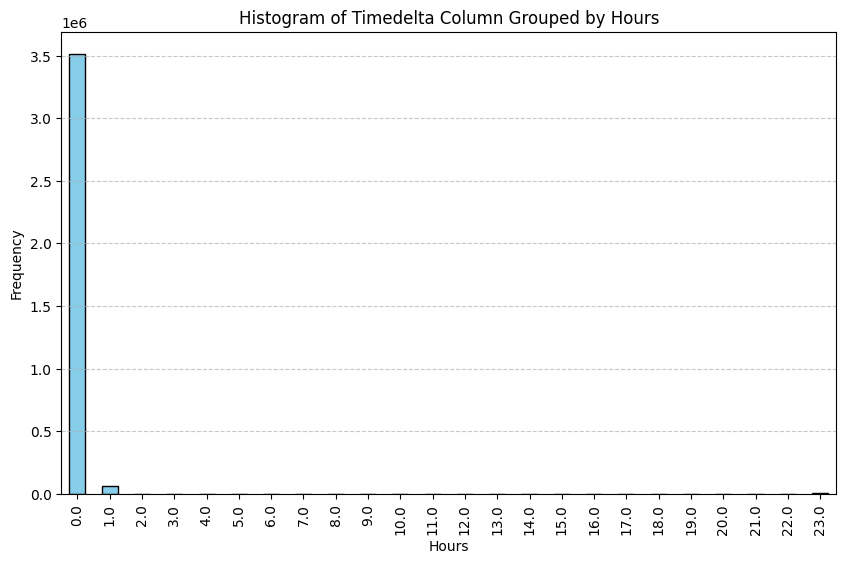

In [15]:
# Extract the total hours from the timedelta column
df_may_less_1_day['hours'] = df_may_less_1_day['diff_time'].dt.total_seconds() // 3600

# Plot the histogram grouped by hours
plt.figure(figsize=(10, 6))
df_may_less_1_day['hours'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Timedelta Column Grouped by Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



The following dataframe tell us the percentage of trips per hour, whose duration lies between 0 and 1 hours, 1 and 2 hours, and so on.

In [16]:
hour_ranges = pd.DataFrame()
hour_ranges['ranges'] = [f'{i}-{i+1}' for i in range(0, 24, 1)]
hour_ranges['total_rides'] = df_may_less_1_day['hours'].value_counts().sort_index().values
s = hour_ranges['total_rides'].sum()
hour_ranges['percent'] = (hour_ranges['total_rides'] / s)*100
hour_ranges

,ranges,total_rides,percent
0,0-1,3514475,97.977897
1,1-2,66557,1.855502
2,2-3,911,0.025397
3,3-4,151,0.004210
4,4-5,75,0.002091
5,5-6,56,0.001561
6,6-7,59,0.001645
7,7-8,50,0.001394
8,8-9,43,0.001199
9,9-10,51,0.001422


Since most trips last less than two hours, we dropp all trips with a duration longer thatn two hours

In [17]:
df_may_valid_time = df_may_less_1_day.drop(df_may_less_1_day[df_may_less_1_day['diff_time'].dt.total_seconds() 
                                                              > 3600*2].index)

Next, we drop the missing values. For this purpose, we first count from each column, the nan values

In [18]:
nan_values = pd.DataFrame()
nan_values['values'] = df_may_valid_time.isna().sum()
nan_values['percentage'] = nan_values['values'] / df_may_valid_time.shape[0]*100
nan_values

,values,percentage
VendorID,0,0.000000
tpep_pickup_datetime,0,0.000000
tpep_dropoff_datetime,0,0.000000
passenger_count,128085,3.576759
trip_distance,0,0.000000
RatecodeID,128085,3.576759
store_and_fwd_flag,128085,3.576759
PULocationID,0,0.000000
DOLocationID,0,0.000000
payment_type,0,0.000000


In [19]:
nan_by_row = df_may_valid_time.isna().sum(axis=1)

nan_by_row.value_counts()

0    3452950
5     128085
Name: count, dtype: int64

In [20]:
df_may_cleaned = df_may_valid_time.dropna()

Now, we report the frequency of pick up and drop off days. Although the travels last less than two hours, some trips could start in a day, and end the day after; therefore, some discrepance between the frequencies of the pick up and drop off may differs

C:\Users\Modemat\AppData\Local\Temp\ipykernel_241216\257446035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may_cleaned['day_of_week_pick_up'] = df_may_cleaned['tpep_pickup_datetime'].dt.day_name()
C:\Users\Modemat\AppData\Local\Temp\ipykernel_241216\257446035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may_cleaned['day_of_week_drop_off'] = df_may_cleaned['tpep_dropoff_datetime'].dt.day_name()


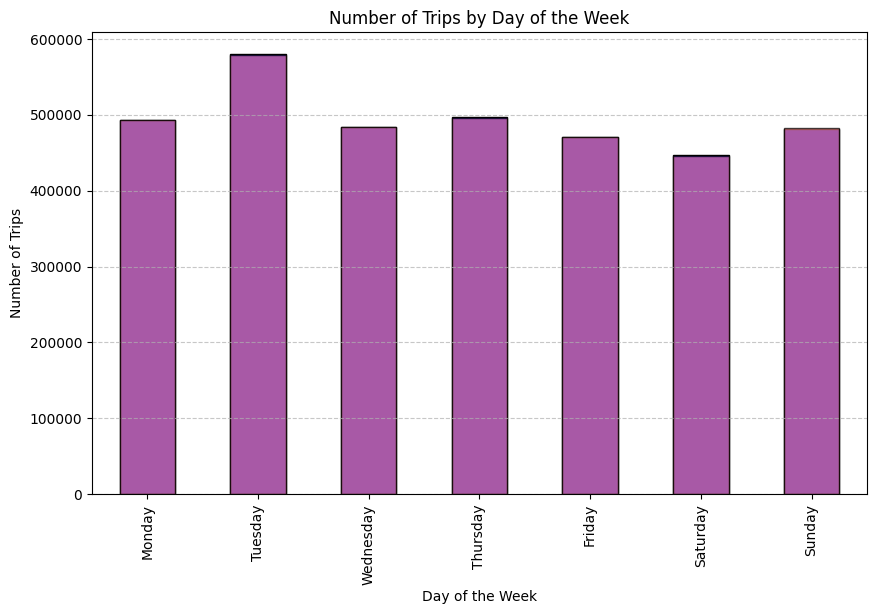

In [21]:
# Extract the day of the week from the datetime column
df_may_cleaned['day_of_week_pick_up'] = df_may_cleaned['tpep_pickup_datetime'].dt.day_name()
df_may_cleaned['day_of_week_drop_off'] = df_may_cleaned['tpep_dropoff_datetime'].dt.day_name()

# Count the number of trips for each day of the week
trips_per_day_pick_up = df_may_cleaned['day_of_week_pick_up'].value_counts()
trips_per_day_drop_off = df_may_cleaned['day_of_week_drop_off'].value_counts()

# Sort by the natural order of days (optional)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_per_day_pick_up = trips_per_day_pick_up.reindex(day_order)
trips_per_day_drop_off = trips_per_day_drop_off.reindex(day_order)

# Plot the results (optional)

plt.figure(figsize=(10, 6))
trips_per_day_pick_up.plot(kind='bar', color='blue', edgecolor='black', label='Pick-Up')
trips_per_day_drop_off.plot(kind='bar', color='lightcoral', edgecolor='black', alpha=0.7, label='Drop-Off')
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The following dataframe reports the total number of trips that begin in a specific day and end the day after.

In [22]:
trips_cross_day = df_may_cleaned[
    df_may_cleaned['tpep_dropoff_datetime'].dt.date > df_may_cleaned['tpep_pickup_datetime'].dt.date
]

# Count the number of such trips
num_cross_day_trips = trips_cross_day.shape[0]

print(f"Number of trips that start in one day and finish the next day: {num_cross_day_trips}")

Number of trips that start in one day and finish the next day: 28525


We to compute day by day the number of trips that begin in a day, and end the day after

C:\Users\Modemat\AppData\Local\Temp\ipykernel_241216\2586316783.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_cross_day['pickup_day'] = trips_cross_day['tpep_pickup_datetime'].dt.day_name()


Number of trips that start on one day and finish the next, grouped by pickup day:
pickup_day
Monday       2964
Tuesday      4026
Wednesday    3832
Thursday     4386
Friday       5016
Saturday     5157
Sunday       3144
dtype: int64


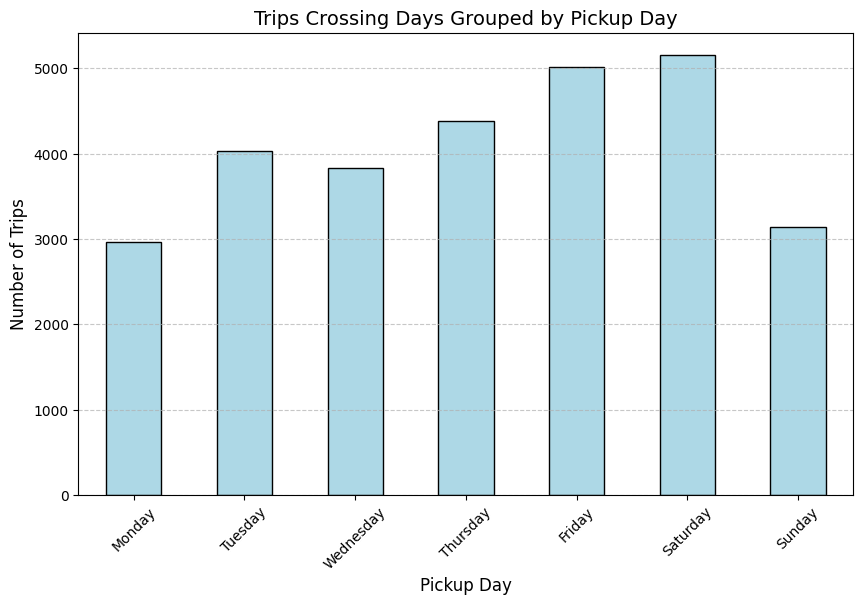

In [23]:
# Filter trips that start on one day and finish the next day
trips_cross_day = df_may_cleaned[
    df_may_cleaned['tpep_dropoff_datetime'].dt.date > df_may_cleaned['tpep_pickup_datetime'].dt.date
]

# Add a new column for the pickup day
trips_cross_day['pickup_day'] = trips_cross_day['tpep_pickup_datetime'].dt.day_name()

# Group by pickup day and count the number of trips
cross_day_report = trips_cross_day.groupby('pickup_day').size()

# Optional: Sort by natural order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cross_day_report = cross_day_report.reindex(day_order).fillna(0).astype(int)

# Print the report
print("Number of trips that start on one day and finish the next, grouped by pickup day:")
print(cross_day_report)


plt.figure(figsize=(10, 6))
cross_day_report.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Trips Crossing Days Grouped by Pickup Day', fontsize=14)
plt.xlabel('Pickup Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Now, we present the number of trips made along all the month, grouped by the pick up hour. It seems that the majority of the trips are made from 12:00 to 21:00 during the month

C:\Users\Modemat\AppData\Local\Temp\ipykernel_241216\1039599109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may_cleaned['pickup_hour'] = df_may_cleaned['tpep_pickup_datetime'].dt.hour


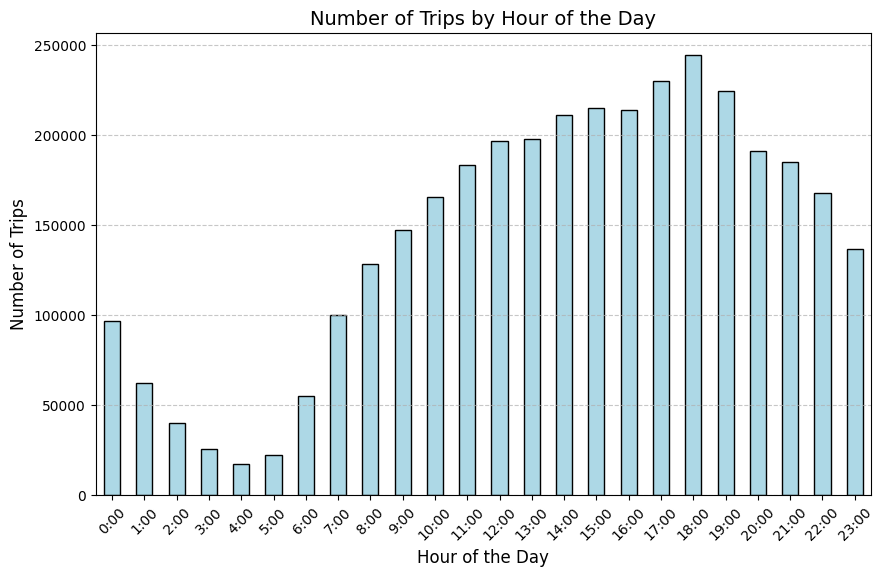

In [24]:
# Extract the hour from the datetime column
df_may_cleaned['pickup_hour'] = df_may_cleaned['tpep_pickup_datetime'].dt.hour

# Count the number of trips for each hour
trips_per_hour = df_may_cleaned['pickup_hour'].value_counts().sort_index()

# Plot of number of trips by hour, for each day of the week 
plt.figure(figsize=(10, 6))
trips_per_hour.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Number of Trips by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(0, 24), labels=[f"{h}:00" for h in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The following set of graphics show the total trips made from each day of the month, grouped by the pick up hour

C:\Users\Modemat\AppData\Local\Temp\ipykernel_241216\2551792714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may_cleaned['pickup_day'] = df_may_cleaned['tpep_pickup_datetime'].dt.day_name()


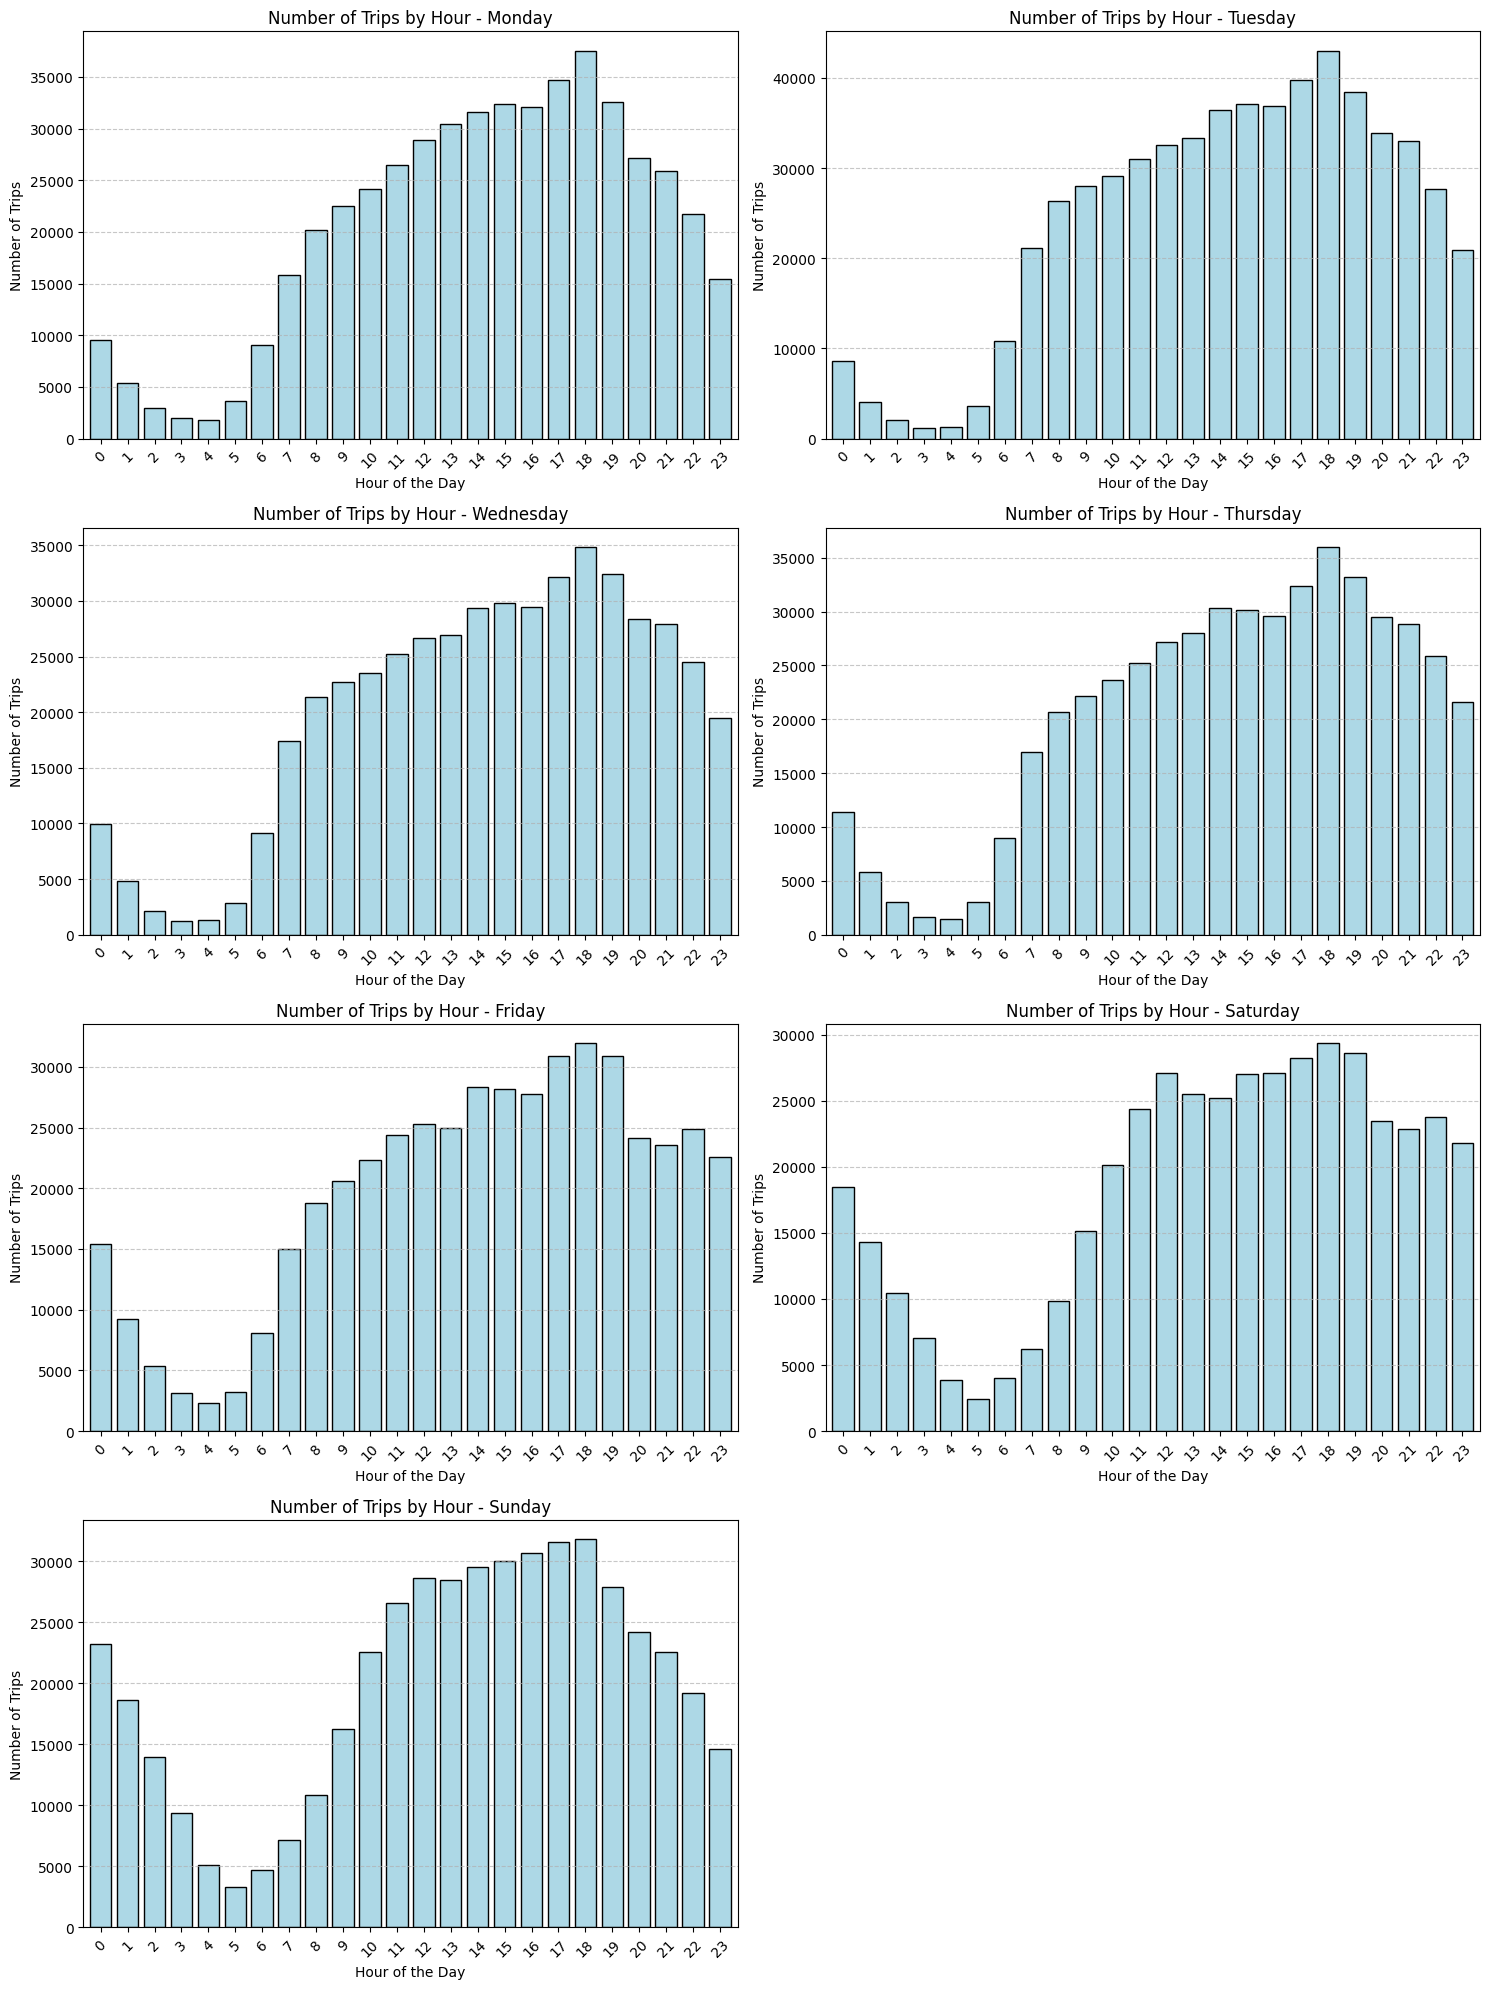

In [25]:
# Extract the day of the week
df_may_cleaned['pickup_day'] = df_may_cleaned['tpep_pickup_datetime'].dt.day_name()

# Group by day of the week and hour
grouped_data = df_may_cleaned.groupby(['pickup_day', 'pickup_hour']).size().unstack(fill_value=0)

grouped_data = grouped_data.reindex(day_order)

# Plot 7 separate graphs, one for each day
plt.figure(figsize=(15, 20))
for i, day in enumerate(day_order):
    plt.subplot(4, 2, i + 1)  # Arrange plots in a grid
    grouped_data.loc[day].plot(kind='bar', color='lightblue', edgecolor='black', width=0.8)
    plt.title(f'Number of Trips by Hour - {day}', fontsize=12)
    plt.xlabel('Hour of the Day', fontsize=10)
    plt.ylabel('Number of Trips', fontsize=10)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


The following set of graphics shows the sum of the fare amounts at each hour and day of the week. 

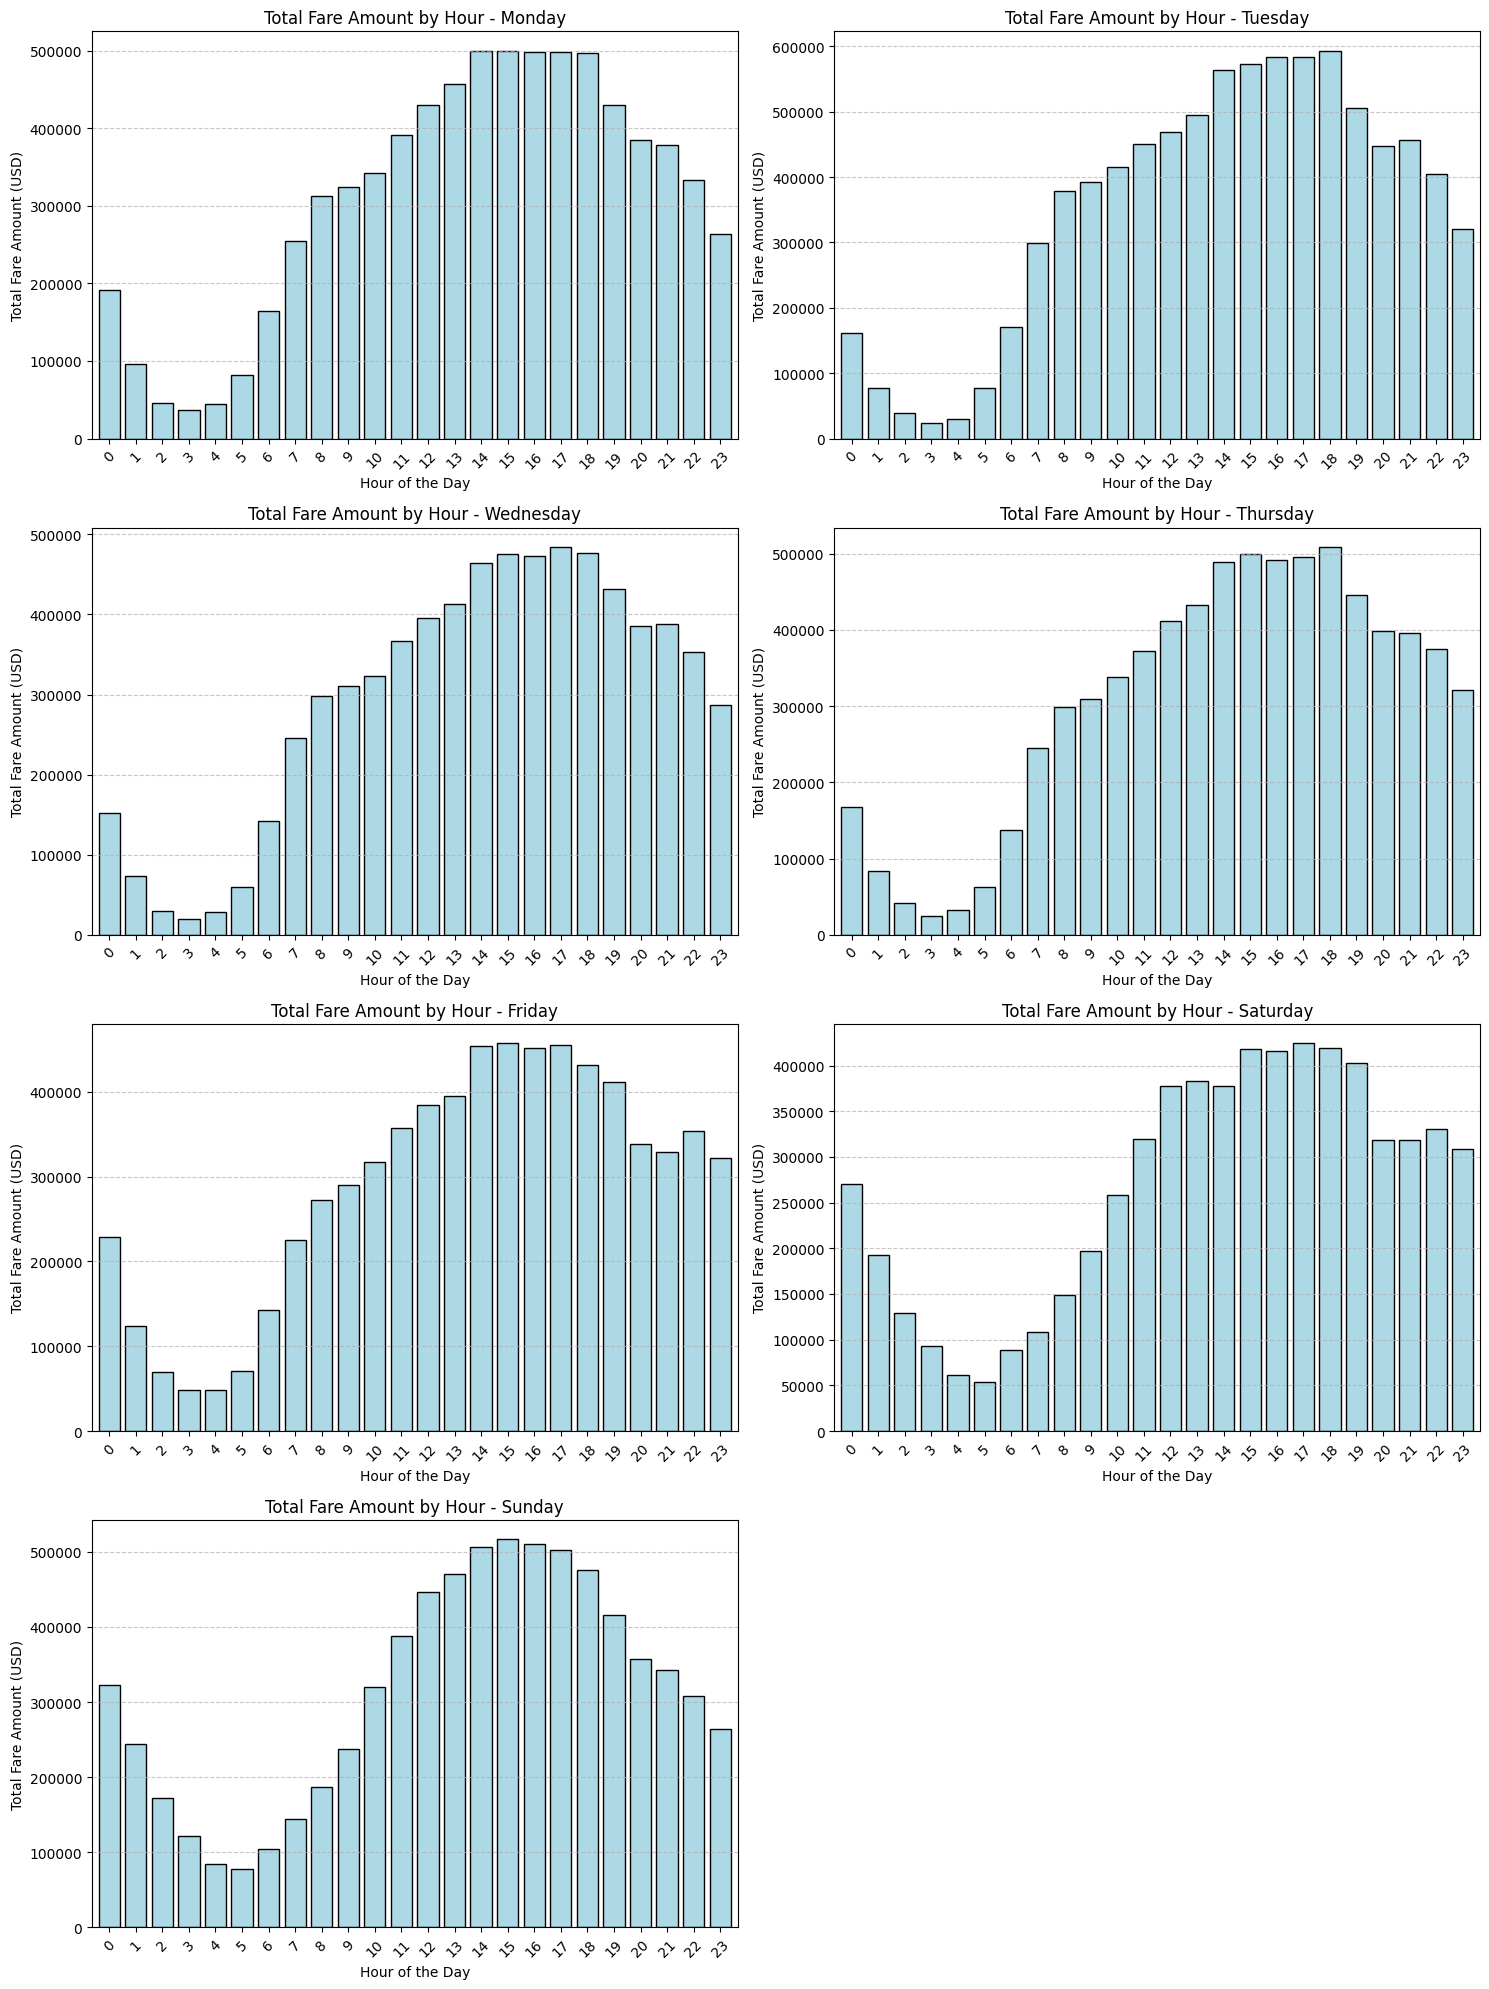

In [26]:
# Group by day and hour, summing up the fare amount
total_fare_by_day_hour = df_may_cleaned.groupby(['pickup_day', 'pickup_hour'])['fare_amount'].sum()

total_fare_by_day_hour = total_fare_by_day_hour.reorder_levels(['pickup_day', 'pickup_hour'])
total_fare_by_day_hour = total_fare_by_day_hour.loc[day_order]

# Plotting: 7 graphs for each day
plt.figure(figsize=(15, 20))
for i, day in enumerate(day_order):
    plt.subplot(4, 2, i + 1)  # Arrange plots in a grid

    # Filter data for the current day
    day_data = total_fare_by_day_hour.loc[day]

    # Plot
    day_data.plot(kind='bar', color='lightblue', edgecolor='black', width=0.8)
    plt.title(f'Total Fare Amount by Hour - {day}', fontsize=12)
    plt.xlabel('Hour of the Day', fontsize=10)
    plt.ylabel('Total Fare Amount (USD)', fontsize=10)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


For a global vision of the fare amounts across the month, we present the following histogram, which resumes the total fare amount from each day of the week, for all the month 

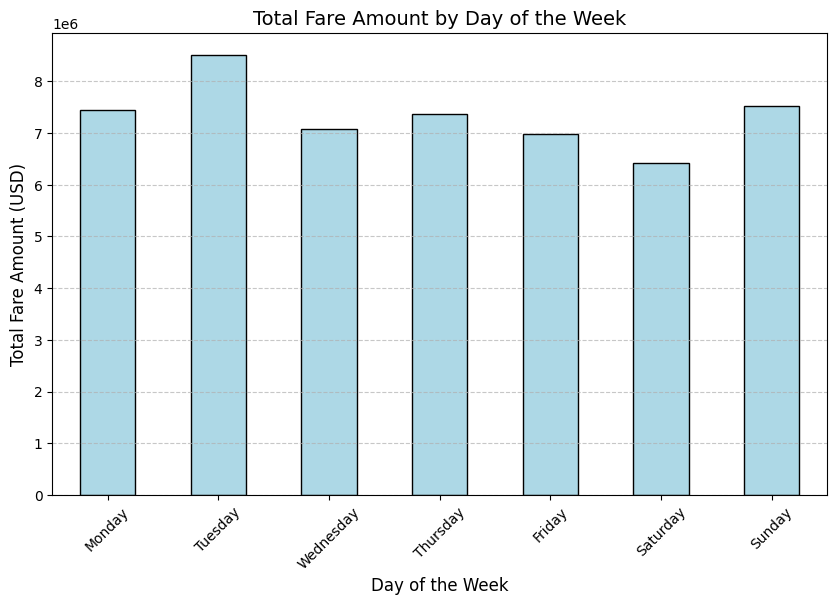

In [27]:
# Extract the total fare amount grouped by day of the week
total_fare_by_day = df_may_cleaned.groupby(['pickup_day'])['fare_amount'].sum()

total_fare_by_day = total_fare_by_day.reindex(day_order)

# Plot of total fare by day
plt.figure(figsize=(10, 6))
total_fare_by_day.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Total Fare Amount by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Fare Amount (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Finally, we resume the fare amount grouped by hours, for all the month.

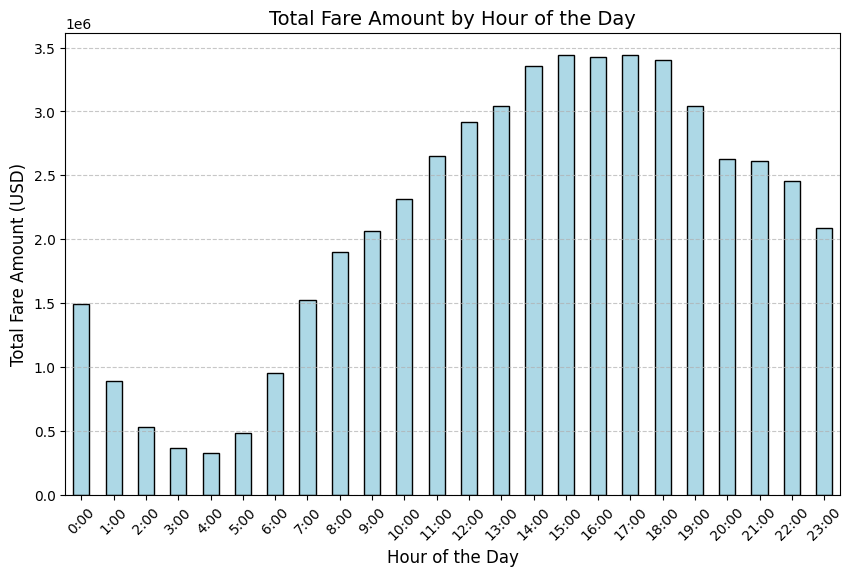

In [28]:
# Group by pickup hour and calculate the total fare amount
total_fare_by_hour = df_may_cleaned.groupby(['pickup_hour'])['fare_amount'].sum()

# Plot of total fare amount by hour
plt.figure(figsize=(10, 6))
total_fare_by_hour.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Total Fare Amount by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Fare Amount (USD)', fontsize=12)
plt.xticks(range(0, 24), labels=[f"{h}:00" for h in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [29]:
df_may = df_may_cleaned

Now, we need to investigate all those trips that has a duration less than 1 minute, because those trips could represent an outlier for this particular bussines, if the fare amount of these are considerably high.

In [30]:
df_may[df_may['diff_time'].dt.total_seconds() < 60].dropna()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,diff_time,hours,day_of_week_pick_up,day_of_week_drop_off,pickup_hour,pickup_day
25,1,2022-05-01 00:16:00,2022-05-01 00:16:00,1.0,0.00,1.0,N,142,264,2,...,0.3,9.80,2.5,0.0,0 days 00:00:00,0.0,Sunday,Sunday,0,Sunday
88,2,2022-05-01 00:37:46,2022-05-01 00:38:32,1.0,0.10,1.0,N,249,249,2,...,0.3,6.30,2.5,0.0,0 days 00:00:46,0.0,Sunday,Sunday,0,Sunday
132,2,2022-05-01 00:04:59,2022-05-01 00:05:29,2.0,0.64,1.0,N,229,229,1,...,0.3,8.30,2.5,0.0,0 days 00:00:30,0.0,Sunday,Sunday,0,Sunday
246,1,2022-05-01 00:17:06,2022-05-01 00:17:25,1.0,0.00,5.0,Y,229,229,2,...,0.3,75.30,0.0,0.0,0 days 00:00:19,0.0,Sunday,Sunday,0,Sunday
472,1,2022-05-01 00:53:02,2022-05-01 00:53:47,1.0,0.00,1.0,N,230,230,3,...,0.3,6.30,2.5,0.0,0 days 00:00:45,0.0,Sunday,Sunday,0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458550,2,2022-05-31 23:51:02,2022-05-31 23:51:07,4.0,0.00,5.0,N,162,162,1,...,0.3,96.36,0.0,0.0,0 days 00:00:05,0.0,Tuesday,Tuesday,23,Tuesday
3458648,2,2022-05-31 23:18:45,2022-05-31 23:19:05,2.0,0.01,5.0,N,164,164,2,...,-0.3,-73.30,0.0,0.0,0 days 00:00:20,0.0,Tuesday,Tuesday,23,Tuesday
3458649,2,2022-05-31 23:18:45,2022-05-31 23:19:05,2.0,0.01,5.0,N,164,164,2,...,0.3,73.30,0.0,0.0,0 days 00:00:20,0.0,Tuesday,Tuesday,23,Tuesday
3458714,2,2022-05-31 23:58:06,2022-05-31 23:58:12,1.0,0.00,1.0,N,238,238,2,...,0.3,6.30,2.5,0.0,0 days 00:00:06,0.0,Tuesday,Tuesday,23,Tuesday


We see that there exists $45918$ trips with a duration less that 1 minute. Moreover, we see that there exist trips with negative fare amounts.

In [31]:
df_may[df_may['fare_amount'] < 0].dropna()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,diff_time,hours,day_of_week_pick_up,day_of_week_drop_off,pickup_hour,pickup_day
100,2,2022-05-01 00:46:22,2022-05-01 01:04:25,1.0,4.43,1.0,N,230,7,4,...,-0.3,-20.30,-2.5,0.00,0 days 00:18:03,0.0,Sunday,Sunday,0,Sunday
129,2,2022-05-01 00:31:38,2022-05-01 00:33:23,1.0,0.32,1.0,N,263,141,4,...,-0.3,-7.30,-2.5,0.00,0 days 00:01:45,0.0,Sunday,Sunday,0,Sunday
602,2,2022-05-01 00:44:58,2022-05-01 00:48:58,1.0,0.79,1.0,N,163,237,4,...,-0.3,-8.80,-2.5,0.00,0 days 00:04:00,0.0,Sunday,Sunday,0,Sunday
844,2,2022-05-01 00:48:28,2022-05-01 00:48:36,1.0,0.00,2.0,N,107,107,4,...,-0.3,-55.30,-2.5,0.00,0 days 00:00:08,0.0,Sunday,Sunday,0,Sunday
884,2,2022-05-01 00:31:21,2022-05-01 00:33:08,1.0,0.67,1.0,N,263,141,4,...,-0.3,-7.80,-2.5,0.00,0 days 00:01:47,0.0,Sunday,Sunday,0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458468,2,2022-05-31 23:33:31,2022-05-31 23:33:59,4.0,0.06,5.0,N,87,261,2,...,-0.3,-27.10,-2.5,0.00,0 days 00:00:28,0.0,Tuesday,Tuesday,23,Tuesday
3458526,2,2022-05-31 23:48:49,2022-06-01 00:12:11,2.0,9.14,1.0,N,138,142,4,...,-0.3,-33.55,-2.5,-1.25,0 days 00:23:22,0.0,Tuesday,Wednesday,23,Tuesday
3458648,2,2022-05-31 23:18:45,2022-05-31 23:19:05,2.0,0.01,5.0,N,164,164,2,...,-0.3,-73.30,0.0,0.00,0 days 00:00:20,0.0,Tuesday,Tuesday,23,Tuesday
3458670,2,2022-05-31 23:12:36,2022-05-31 23:25:02,1.0,3.34,1.0,N,138,179,2,...,-0.3,-14.80,0.0,0.00,0 days 00:12:26,0.0,Tuesday,Tuesday,23,Tuesday


We consider those trips as anomalies. Since the percentage of trips with those anomalies is $0.57\%$, we can drop off these trips

In [32]:
df_may=df_may[df_may['fare_amount'] >= 0]
df_may[df_may['diff_time'].dt.total_seconds() < 60].shape

(40857, 25)

Now, the number of trips with duration less than one minute are less than $1.5\%$. Since the fare amounts for those trips are not realistics, we can drop off those trips too

In [33]:
df_may=df_may[df_may['diff_time'].dt.total_seconds() > 60]

### 3.3 Geographical Analysis

This dataset has pick up and drop off locations encoded by integer values, instead of geographical coordinates. Therefore, at first sight, our model is limited only for aproximate locations delimited for zones. The following cell resumes the different zones present in the dataset.

In [34]:
df_may['PULocationID'].value_counts()

PULocationID
237    168999
132    166334
236    147438
161    134604
142    116153
        ...  
199         1
176         1
105         1
221         1
6           1
Name: count, Length: 257, dtype: int64

We have 258 different locations where the trips begin

In [35]:
df_may['DOLocationID'].value_counts()

DOLocationID
236    150414
237    145920
161    125792
230    101857
170     98703
        ...  
187        17
84         16
176        14
2           5
105         3
Name: count, Length: 260, dtype: int64

We have 260 different locations where the trips end. 

In [36]:
df_may['trip_distance'].describe()

count    3.391370e+06
mean     3.645259e+00
std      1.789313e+01
min      0.000000e+00
25%      1.160000e+00
50%      1.930000e+00
75%      3.650000e+00
max      2.944565e+04
Name: trip_distance, dtype: float64

The description of the column 'trip_distance' suggest us the existence of outliers, since the $Q_3$ metric has a much less order than the maximum reported. In order to determine all the outliers present in the data, we apply the three sigma rule. the next cell resume our findings

In [37]:
mean = df_may['trip_distance'].mean()
std_dev = df_may['trip_distance'].std()

# Define the bounds
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Filter the dataframe
df_outliers_down = df_may[(df_may['trip_distance'] < lower_bound)]
df_outliers_up = df_may[(df_may['trip_distance'] > upper_bound)]
print(f'There are {df_outliers_down.shape[0]} lower outliers and {df_outliers_up.shape[0]} upper outliers')


There are 0 lower outliers and 192 upper outliers


For a quick review of the upper outliers, we present a description for df_outliers_up

In [38]:
df_outliers_up['trip_distance'].describe()

count      192.000000
mean       341.496563
std       2281.591111
min         57.370000
25%         59.957500
50%         64.465000
75%         72.232500
max      29445.650000
Name: trip_distance, dtype: float64

We clean the dataset from these outliers:

In [39]:
df_may = df_may[(df_may['trip_distance'] >= lower_bound) & (df_may['trip_distance'] <= upper_bound)]

Now, we are interested in finding out if there exist trips that begin and end in the same location. The following cell tell us that, in fact, this fact happens.

In [40]:
a = (df_may['PULocationID']==df_may['DOLocationID']).value_counts()
print(f'There are {a.iloc[0]} trips from two different locations, and {a.iloc[1]} from the same locations')

There are 3257228 trips from two different locations, and 133950 from the same locations


For this particular month, the percentage of trips made in the same location is $5.325672\%$. Now, we are interested in the number of trips made inside a location, and moreover, if the reported trips are more or less uniformly distributed. The following cell resumes this fact

In [41]:
df_trips_outside = df_may[df_may['PULocationID']!=df_may['DOLocationID']]
df_trips_inside =  df_may[df_may['PULocationID']==df_may['DOLocationID']] 


df_summary_inside = df_trips_inside.groupby('PULocationID').agg(
    number_of_trips=('PULocationID', 'size'),      # Count the number of trips
    total_fare_amount=('fare_amount', 'sum'),     # Sum of fare amounts
    total_distance=('trip_distance', 'sum')       # Sum of distances
).reset_index()


print(df_summary_inside)


     PULocationID  number_of_trips  total_fare_amount  total_distance
0               1               99            8379.53          163.27
1               3                2              19.20            0.10
2               4               63             507.70           52.96
3               6                1              18.45           12.00
4               7              273            2284.12          275.47
..            ...              ...                ...             ...
217           261              164            1599.20          203.61
218           262             1316            8235.84         1166.02
219           263             2870           15109.11         2172.01
220           264            16176          245963.51        59261.55
221           265              364           34038.03         1407.50

[222 rows x 4 columns]


In [42]:
df_summary_inside['number_of_trips'].describe()

count      222.000000
mean       603.378378
std       1938.623090
min          1.000000
25%          4.000000
50%         13.000000
75%        177.500000
max      16176.000000
Name: number_of_trips, dtype: float64

From the data above, we conclude that the number of trips are very disperse because of the standar deviation metric. Evenmore, although there are 260 locations, we have information of inside trips for 243 ones, so we do not known what happens inside the other 17 locations.

Respect to the trips between two different locations, the stadistics are the following:

In [43]:
df_summary_outside = df_trips_outside['PULocationID'].value_counts()

df_summary_outside.shape

(256,)

In [44]:
df_summary_outside = df_trips_outside['DOLocationID'].value_counts()

df_summary_outside.shape

(260,)

The discrepance between the last two numbers show us that exist information for trips that begin in 257 locations and end in any of the 260 locations; therefore, we do not have information for trips begin in any of the locations, only for 257 of them.

We present an histogram of number of trips begin from a set of locations:

     PULocationID   count
0             132  163951
1             237  154092
2             236  133643
3             161  130144
4             142  111982
..            ...     ...
251           245       1
252           172       1
253           187       1
254           176       1
255           199       1

[256 rows x 2 columns]


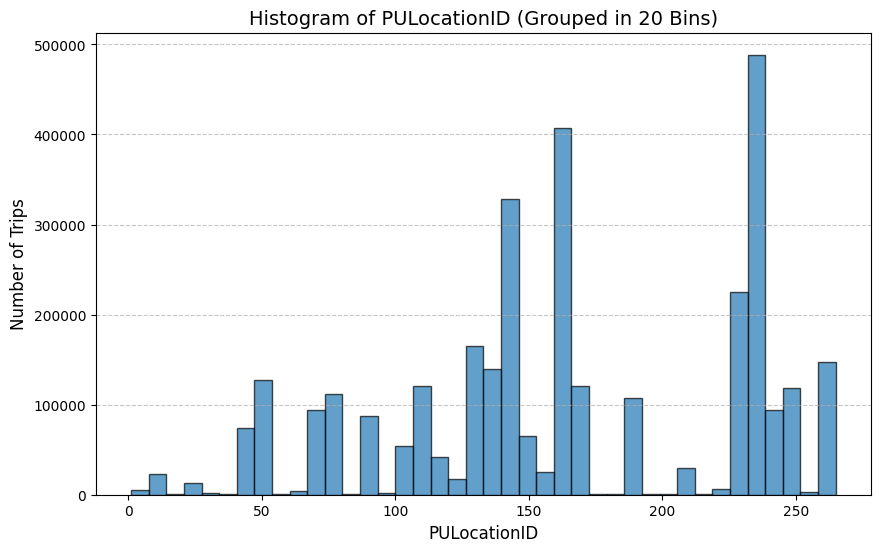

In [45]:
df_summary_outside = df_trips_outside['PULocationID'].value_counts().reset_index()

# Renaming the columns for clarity
df_summary_outside.columns = ['PULocationID', 'count']

# Displaying the resulting DataFrame
print(df_summary_outside)

plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df_trips_outside['PULocationID'], bins=40, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('PULocationID', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Histogram of PULocationID (Grouped in 20 Bins)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the histogram
plt.show()

     DOLocationID   count
0             236  136620
1             237  131015
2             161  121332
3             230   98975
4             170   95680
..            ...     ...
255           187      17
256            84      16
257           176      14
258             2       5
259           105       3

[260 rows x 2 columns]


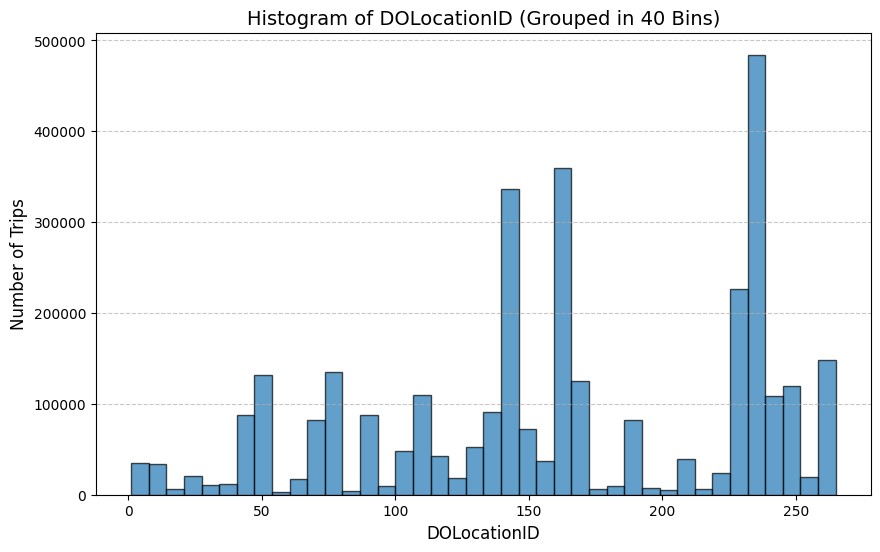

In [46]:
# Calculate value counts for DOLocationID
df_summary_outside_DO = df_trips_outside['DOLocationID'].value_counts().reset_index()

# Renaming the columns for clarity
df_summary_outside_DO.columns = ['DOLocationID', 'count']

# Displaying the resulting DataFrame
print(df_summary_outside_DO)

# Create the histogram for DOLocationID
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df_trips_outside['DOLocationID'], bins=40, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('DOLocationID', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Histogram of DOLocationID (Grouped in 40 Bins)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the histogram
plt.show()


From these two graphs we see that there exist a big difference between the number of trips from one location to another, being the zones with ID greater than $100$ the most demanded lozations 

#### Correlation matrix

Now, after removing the possible outliers, we determine the correlation between the float variables. The following cell contains the correlation heat map 

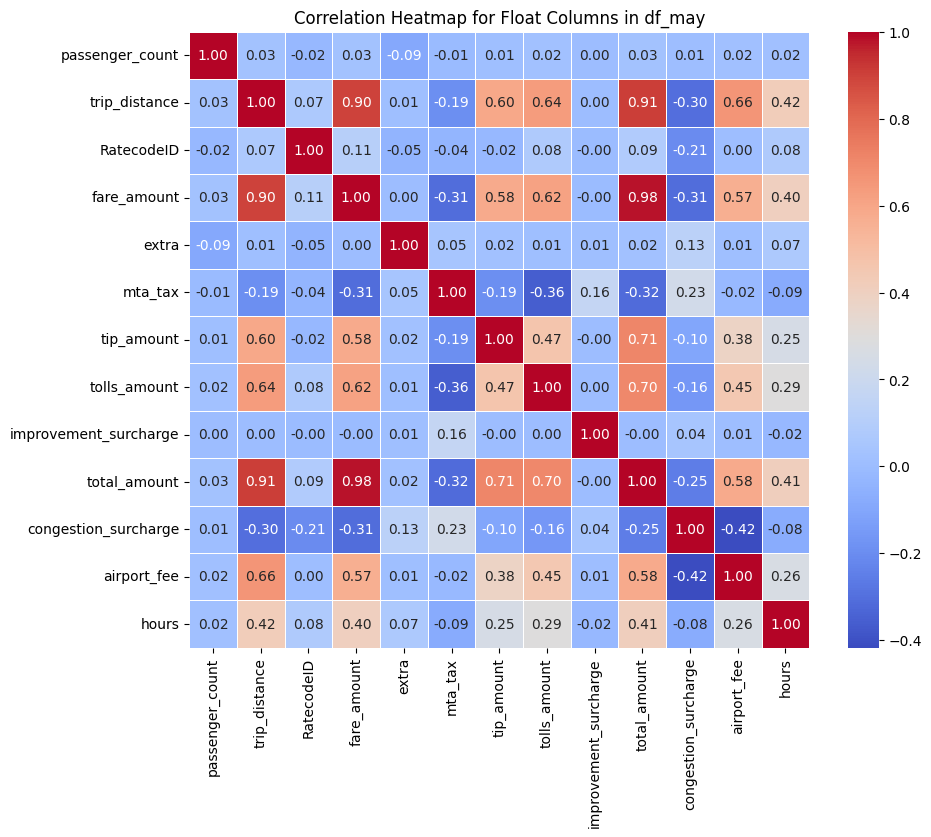

In [47]:
import seaborn as sns

# Select only float columns from the DataFrame
float_columns = df_may.select_dtypes(include='float')

# Compute the correlation matrix
corr_matrix = float_columns.corr()

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Float Columns in df_may')
plt.show()

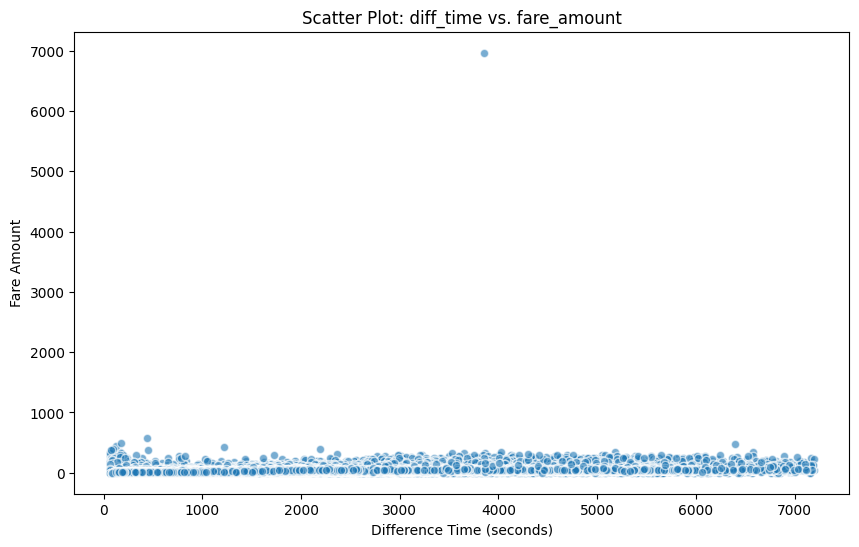

In [48]:
# Convert diff_time to a numerical format (e.g., seconds)
df_may['diff_time_seconds'] = (df_may['diff_time']).dt.total_seconds()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_may['diff_time_seconds'], df_may['fare_amount'], alpha=0.6, edgecolors='w')
plt.xlabel('Difference Time (seconds)')
plt.ylabel('Fare Amount')
plt.title('Scatter Plot: diff_time vs. fare_amount')
plt.show()

As we can seen, there exist a fare amount that can be consider as outlier. We look it with more detail:

In [52]:
max_fare_row = df_may.loc[df_may['fare_amount'].idxmax()]
print(max_fare_row)

VendorID                                   2
tpep_pickup_datetime     2022-05-31 16:21:11
tpep_dropoff_datetime    2022-05-31 17:25:22
passenger_count                          1.0
trip_distance                           4.44
RatecodeID                               1.0
store_and_fwd_flag                         N
PULocationID                             170
DOLocationID                             263
payment_type                               2
fare_amount                           6966.5
extra                                    1.0
mta_tax                                  0.5
tip_amount                               0.0
tolls_amount                             0.0
improvement_surcharge                    0.3
total_amount                          6970.8
congestion_surcharge                     2.5
airport_fee                              0.0
diff_time                    0 days 01:04:11
hours                                    1.0
day_of_week_pick_up                  Tuesday
day_of_wee

In [54]:
df_may = df_may.drop(df_may['fare_amount'].idxmax())

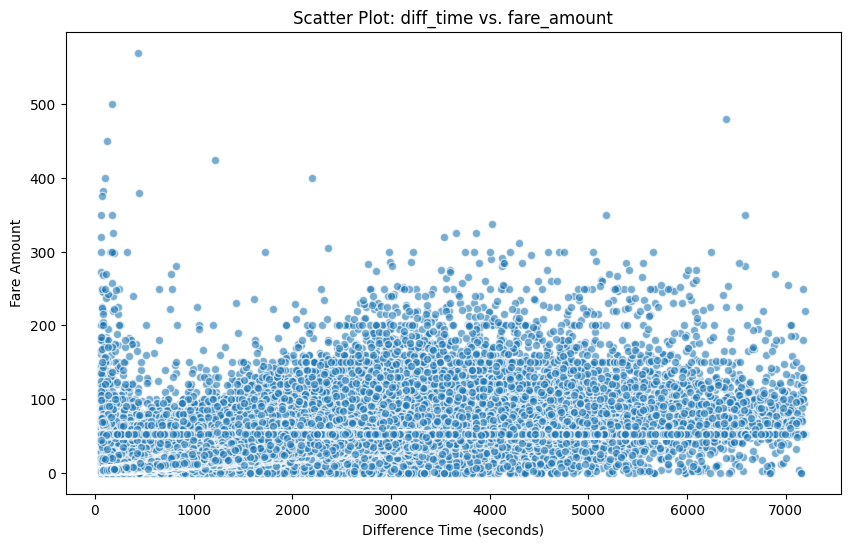

In [55]:
df_may['diff_time_seconds'] = (df_may['diff_time']).dt.total_seconds()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_may['diff_time_seconds'], df_may['fare_amount'], alpha=0.6, edgecolors='w')
plt.xlabel('Difference Time (seconds)')
plt.ylabel('Fare Amount')
plt.title('Scatter Plot: diff_time vs. fare_amount')
plt.show()

The scatter plot between diff_time (seconds) and fare_amount shows a dense clustering of points within 0 to 7000 seconds and fare amounts below 100, suggesting that most rides are of shorter duration and lower fares. Outliers are present with fare_amount values above 400 and longer trip durations, indicating possible anomalies. No clear trend is observed between the variables, implying a weak or non-existent direct correlation. It is recommended to investigate and handle outliers, compute correlation coefficients, and segment the data by trip duration for deeper insights.
